# **Bank Customer Churn Prediction**

Here you can find the interactive version of the notebook [https://marinatrofimovich.github.io/](https://marinatrofimovich.github.io/).

# Table of contents

* [1. Introduction](#int)
    * [1.1 Problem](#pr)
    * [1.2 Objectives](#obj)
    * [1.3 Data description](#dd)
* [2. Importing of the libraries & settings](#set)
* [3. Analysis and visualization](#av)
    * [3.1 Correlation analysis](#ca)
    * [3.2 Target "Exited"](#te)
    * [3.3 CreditScore](#cs)
    * [3.4 Geography](#geo)
    * [3.5 Gender](#ge)
    * [3.6 Age](#age)
    * [3.7 Balance](#ba)
    * [3.8 NumOfProducts](#np)
    * [3.9 IsActiveMember](#am)
* [4. Data Preprocessing](#dp)
* [5. Machine learning models](#ml)
    * [5.1 Logistic Regression](#LR)
    * [5.2 K-nearest neighbors](#KNN)
    * [5.3 Support Vector Machine](#SVM)
    * [5.4 Random Forest](#RF)
* [6. Model selection. Conclusions](#MS)

# 1. Introduction<a class="anchor" id="int"></a>



<div align="justify">Customer churn is the percentage of customers that stopped using the company's product or service during a certain time frame. Predicting customer churn is a problem of great interest. Having the ability to predict future churn rates is necessary for every branch of business. It can help to predict future revenue and, in particular, to identify, address, and get back customers that are likely to churn.
The solution to this problem also makes it possible to identify and improve upon areas where customer service is lacking.</div> 

## 1.1 Problem<a class="anchor" id="pr"></a>

<div align="justify">In this research, we will try to solve the challenge of predicting customer churn for a given dataset:</div> 

[Kaggle - predicting-churn-for-bank-customers](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).

<div align="justify">This dataset contains information about the bank's customers. Using the churned customers as a means of understanding why customers are leaving, we will analyze how and when churn occurs in a customer's life cycle with the bank and even try to predict the customer's churn. In the future the bank can use that information to put into place preemptive measures.</div>

## 1.2 Objectives<a class="anchor" id="obj"></a>

- identify and visualize which factors contribute to the customer churn.
- build a prediction model that will classify if a customer is going to churn or not.

## 1.3 Data description<a class="anchor" id="dd"></a>

Dataset contains 10000 customers and 14 features.

Column names:

1.   RowNumber,
2.   CustomerId,
3.   Surname,
4.   CreditScore,
5.   Geography,
6.   Gender,
7.   Age,
8.   Tenure,
9.   Balance,
10.  NumOfProducts,
11.  HasCrCard,
12.  IsActiveMember,
13.  EstimatedSalary,
14.  Exited.

"Exited" is the target value. It is equal to 1 for churned customers and 0 for others.

# 2. Importing of the libraries & settings<a class="anchor" id="set"></a>

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import IPython
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
warnings.filterwarnings("ignore")

In [3]:
cf.go_offline()

In [186]:
# for static version
import plotly.io as pio
pio.renderers.default='notebook'

In [5]:
# for Google colab
#def enable_plotly_in_cell():
#  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
#  init_notebook_mode(connected=False)

# 3. Analysis and visualization<a class="anchor" id="av"></a>

In this section we will explore the data and try to understand what features contribute to the customer churn.

## 3.1 Correlation analysis<a class="anchor" id="ca"></a>

<div align="justify">Let's start with the correlation analysis. First, we will take a look at our data precisely and remove the columns that obviously do not contribute to the customer churn rate.</div>

In [187]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<div align="justify">We can see that the feature "RowNumber" does not contain any valuable information, and we can exclude it from consideration.</div>

In [189]:
data["CustomerId"].nunique()

10000

We can see that all customer's ids are unique. The column "CustomerId" does not add anything new as well.

In [190]:
data["Surname"].nunique()

2932

In [191]:
data["Surname"].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Moody        1
Carvosso     1
Loton        1
Gebhart      1
Fairley      1
Name: Surname, Length: 2932, dtype: int64

There are only 2932 unique surnames. But, as all user's ids are unique, we are talking about namesakes.

<div align="justify">The considered columns do not contribute to the customer churn, and we can exclude them all from consideration.</div>

In [192]:
df = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

<div align="justify">Now let's see if there is a correlation between the target value "Exited" and the remaining numerical features.</div>

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [194]:
s = (df.dtypes == 'object')
cat_cols = list(s[s].index)
print("(Categorical) variables with string values:")
print(cat_cols)

(Categorical) variables with string values:
['Geography', 'Gender']


In [195]:
s = (df.dtypes != 'object')
num_cols = list(s[s].index)
print("(Discrete, continuous, binary) variables with numeric values:")
print(num_cols)

(Discrete, continuous, binary) variables with numeric values:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


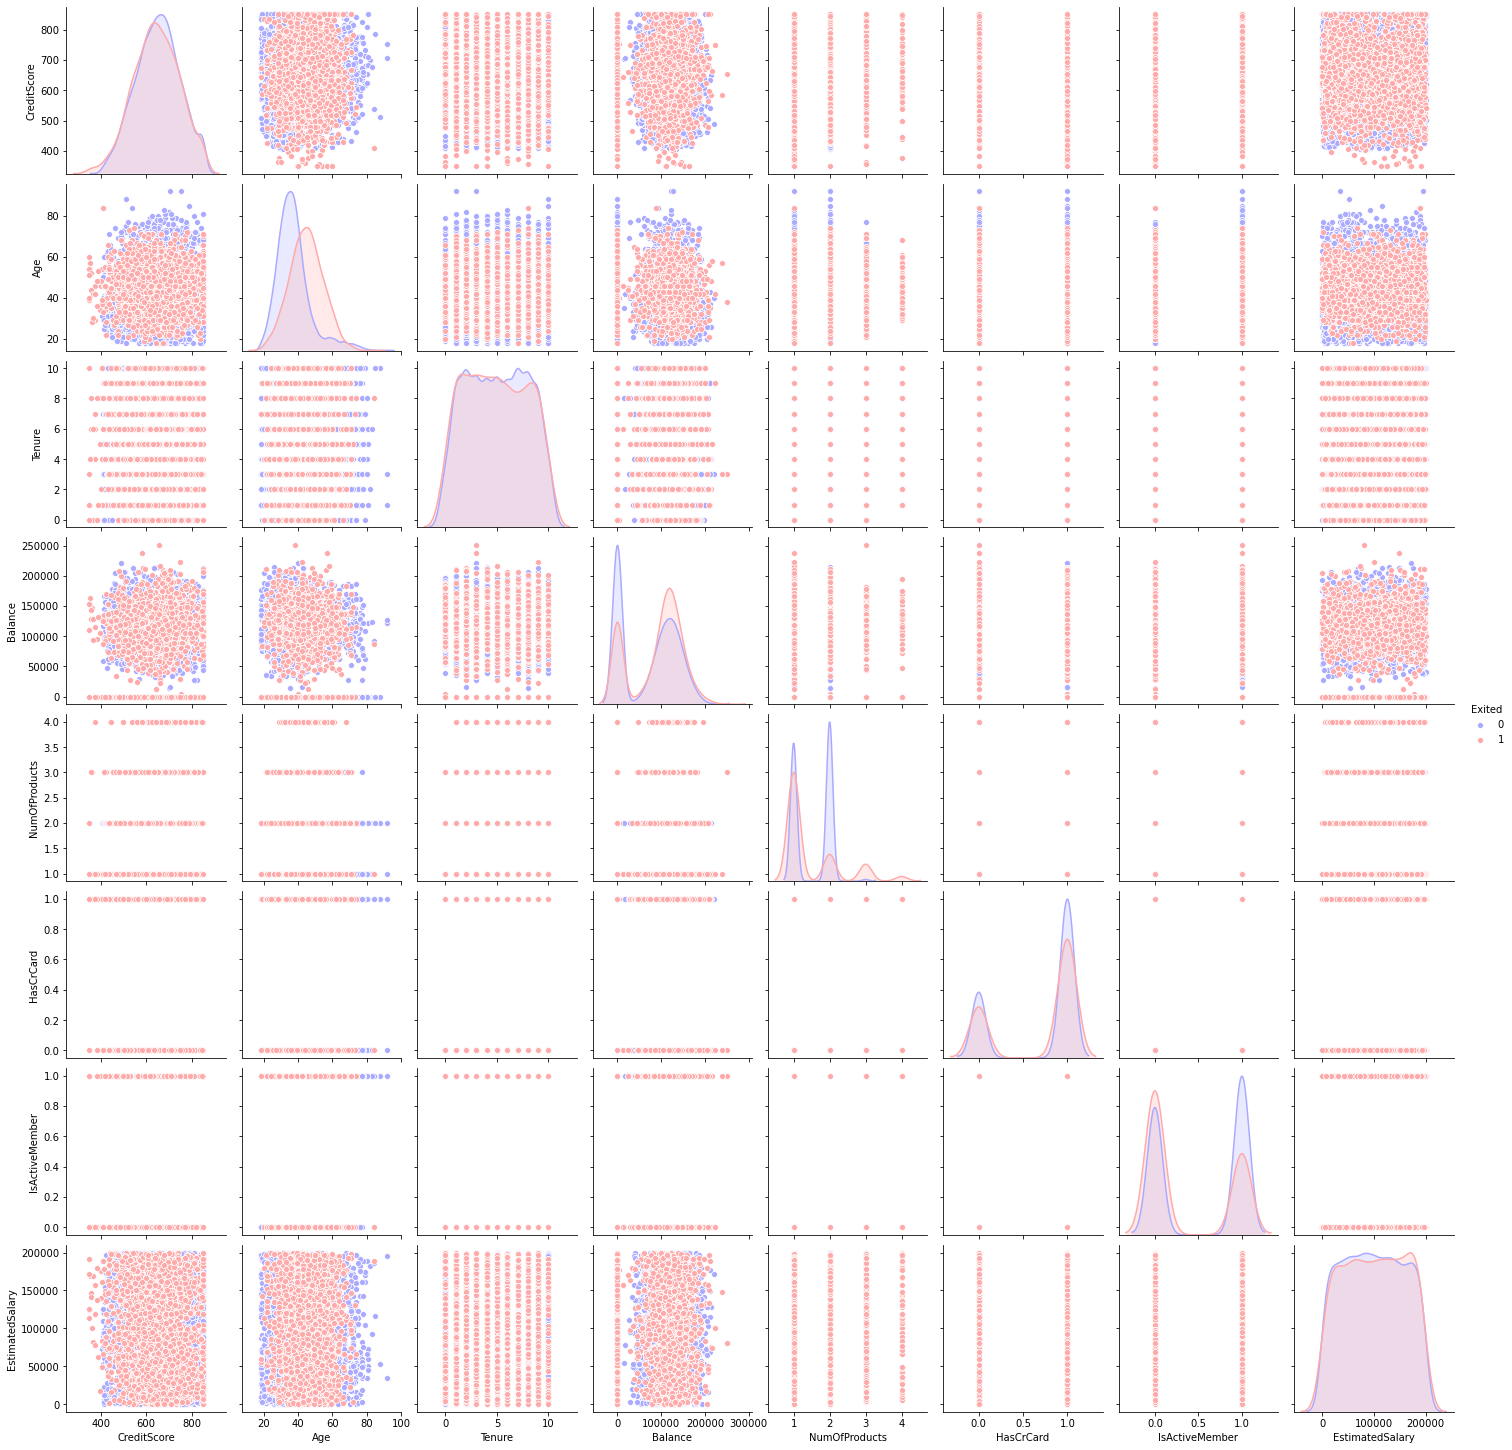

In [196]:
sns.pairplot(df[num_cols], hue='Exited', palette='bwr')

<div align="justify">On this graph, we can already see some insights. Most of the "Exited" customers are in the middle age range and their mean age is larger than for "not Exited" category. People with higher balance leave more often. The churn for customers with 3 and 4 products is visibly high. The churn for active members is less than for nonactive ones.</div>

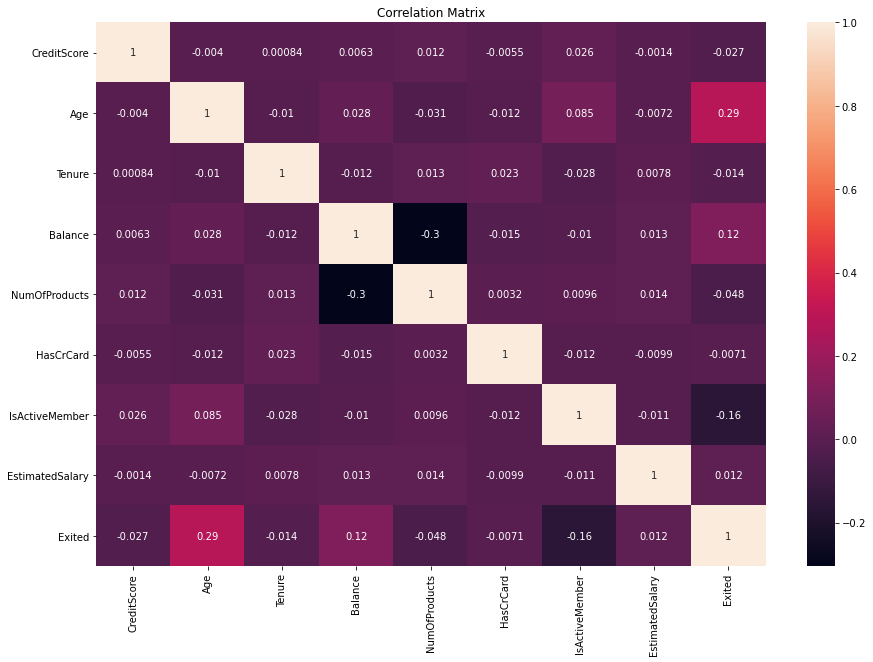

In [197]:
corr_matrix = df[num_cols].corr()

f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(corr_matrix, annot=True)
ax.set_title("Correlation Matrix")
f.show()

<div align="justify">Based on these correlations, we can conclude that the features "Tenure", "EstimatedSalary" and "HasCrCard" are not very important for predicting our target value, and we can omit them as well. Also, we can see that the features "Age" and "Balance" have the highest positive correlation with the churn. The features "IsActiveMember" and "NumOfProducts" also contribute to the churn, but their correlation is negative.</div>

Let's continue our analysis and consider each feature and the target in more detail.

## 3.2 Target "Exited"<a class="anchor" id="te"></a>

In [198]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [199]:
Exites_perc = data[data["Exited"] == 1].shape[0] / data.shape[0] * 100

In [200]:
#enable_plotly_in_cell()
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.15, specs=[[{"type": "xy"},{"type": "xy"}]], subplot_titles=("Churn", "% Churn"))

fig.add_trace(
    go.Bar(x = ["Exited = 0", "Exited = 1"], y = list(data.groupby("Exited")["Exited"].count().values), legendgroup="1", name = "Churn"), row=1, col=1)


fig.add_trace(
    go.Bar(x = ["Exited = 0", "Exited = 1"], y = [100 -  Exites_perc, Exites_perc], legendgroup="2", name = "% Churn"),
    row=1, col=2
)


fig.update_layout(height=400, width=800)
fig['layout']['xaxis']['title']='Exited'
fig['layout']['xaxis2']['title']='Exited'
fig['layout']['yaxis']['title']='frequency'
fig['layout']['yaxis2']['title']='%'
fig.show()

We see that the majority of the clients stay with the bank. Churn percentage is about 20%.

## 3.3 CreditScore<a class="anchor" id="cs"></a>

In [201]:
data["CreditScore"].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

We can see that the minimum credit score is 350, maximum - 850, average - 650.

<div align="justify">Let's divide people into groups according to their credit score. And see the churn in each group. As the groups are not balanced, i.e., they have a very different number of customers, we'll also consider the percentage of churn in each group.</div>

In [202]:
data["CreditScore_Range"] = pd.cut(data["CreditScore"], [349, 450, 550, 650, 750, 850])

CR1 = data["CreditScore_Range"].value_counts(sort=False)
CR2 = data[data["Exited"] == 1]["CreditScore_Range"].value_counts(sort=False)

Credit_perc_df = pd.DataFrame(
    { "Exited":round(CR2/CR1 * 100, 1).to_dict(),
     "not Exited":(100 - round(CR2/CR1 * 100, 1)).to_dict()})

Credit_perc_df.reset_index(inplace=True)
Credit_perc_df.columns = ['CreditScore', 'Exited', 'notExited']

E_CR = data.groupby("Exited")["CreditScore_Range"].value_counts(sort=False)
E_CR

Exited  CreditScore_Range
0       (349, 450]            128
        (450, 550]           1125
        (550, 650]           2627
        (650, 750]           2798
        (750, 850]           1285
1       (349, 450]             61
        (450, 550]            307
        (550, 650]            689
        (650, 750]            667
        (750, 850]            313
Name: CreditScore_Range, dtype: int64

In [205]:
#enable_plotly_in_cell()
fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.3, specs=[[{"type": "xy"},{"type": "xy"}], [{"type": "xy"}, {"type": "xy"}]], subplot_titles=("CreditScore & Churn", "CreditScore distribution", "Churn frequency in CreditScore groups", "% of churn in CreditScore groups"))

fig.add_trace(go.Box(x=data["Exited"], y=data["CreditScore"], legendgroup="1", name = "CreditScore"), row=1, col=1)

fig.add_trace(go.Histogram(x=data["CreditScore"], legendgroup="2", name = "CreditScore"), row=1, col=2)

fig.add_trace(
    go.Bar(x = ["(349, 450]", "(450, 550]", "(550, 650]", "(650, 750]", "(750, 850]"], y = E_CR.values[5:], legendgroup="3", name = "Exited", marker = dict(color = 'blue')),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x = ["(349, 450]", "(450, 550]", "(550, 650]", "(650, 750]", "(750, 850]"], y = E_CR.values[:5], legendgroup="3", name = "not Exited", marker = dict(color = 'orange')),
    row=2, col=1
)


fig.add_trace(
    go.Bar(x = ["(349, 450]", "(450, 550]", "(550, 650]", "(650, 750]", "(750, 850]"], y = Credit_perc_df.Exited, legendgroup="4", name = "Exited", marker = dict(color = 'blue')),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x = ["(349, 450]", "(450, 550]", "(550, 650]", "(650, 750]", "(750, 850]"], y = Credit_perc_df.notExited, legendgroup="4", name = "not Exited", marker = dict(color = 'orange')),
    row=2, col=2
)

fig.update_layout(height=600, width=900)
fig['layout']['xaxis']['title']='Exited'
fig['layout']['xaxis2']['title']='CreditScore'
fig['layout']['xaxis3']['title']='CreditScore'
fig['layout']['xaxis4']['title']='CreditScore'
fig['layout']['yaxis']['title']='CreditScore'
fig['layout']['yaxis2']['title']='frequency'
fig['layout']['yaxis3']['title']='frequency'
fig['layout']['yaxis4']['title']='%'
fig.show()

In [206]:
data[data["Exited"] == 1]["CreditScore"].mean()

645.3514972999509

In [207]:
data[data["Exited"] == 0]["CreditScore"].mean()

651.8531960316463

<div align="justify">We can see that the mean values of credit score in each group are approximately the same: 645 for "Exited", 652 for "not Exited".</div>

<div align="justify">Most often people have an average credit score. Also, a large number of people have extremely big credit score (850).</div>

<div align="justify">Customers with the smallest credit score ((349, 450]) have the highest churn. It reaches more than 30%. But there are few people in that category. In other groups the churn percentage is approximately about 20%.</div>

<div align="justify">At the right box-plot (for people who "exited") we can see so-called outliers. We must take this into account when building a machine learning model to avoid problems.</div>

## 3.4 Geography<a class="anchor" id="geo"></a>

In [208]:
d = pd.DataFrame(data["Geography"].value_counts())
d.reset_index(inplace=True)
d.columns = ["Countries", "Quantity"]
d

Countries  Quantity
0    France      5014
1   Germany      2509
2     Spain      2477

Let see the value of the churn in each country. As the number of people in the countries is not balanced, we'll also consider the percentage of churn for each country.

In [209]:
E_G = data.groupby("Exited")["Geography"].value_counts(sort=False)
E_G

Exited  Geography
0       France       4204
        Germany      1695
        Spain        2064
1       France        810
        Germany       814
        Spain         413
Name: Geography, dtype: int64

In [210]:
Exited_France = round((data[data["Geography"] == "France"]["Exited"] == 1).value_counts()[1] / len(data[data["Geography"] == "France"]) * 100, 2)
Exited_Germany = round((data[data["Geography"] == "Germany"]["Exited"] == 1).value_counts()[1] / len(data[data["Geography"] == "Germany"])* 100, 2)
Exited_Spain = round((data[data["Geography"] == "Spain"]["Exited"] == 1).value_counts()[1] / len(data[data["Geography"] == "Spain"])* 100, 2)

In [211]:
Geography_perc_df = pd.DataFrame(
    { "Exited":{"France": Exited_France,"Germany": Exited_Germany, "Spain": Exited_Spain},  
     "not Exited":{"France": 100-Exited_France,"Germany": 100-Exited_Germany, "Spain": 100-Exited_Spain}})

In [212]:
Geography_perc_df.reset_index(inplace=True)
Geography_perc_df.columns = ['Country', 'Exited', 'notExited']

In [213]:
list(data["Geography"].unique())

['France', 'Spain', 'Germany']

In [215]:
#enable_plotly_in_cell()
fig = make_subplots(rows=1, cols=3, horizontal_spacing=0.2, specs=[[{"type": "domain"}, {"type": "xy"}, {"type": "xy"}]], subplot_titles=('Countries distribution', "Churn frequency", "% of churn"))

fig.add_trace(go.Pie(values=list(d["Quantity"].values), labels=list(d["Countries"].values), legendgroup="1", name = "Country"), row=1, col=1)

fig.add_trace(
    go.Bar(x = ["France", "Germany", "Spain"], y = E_G.values[3:], legendgroup="2", name = "Exited", marker = dict(color = 'blue')),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x = ["France", "Germany", "Spain"], y = E_G.values[:3], legendgroup="2", name = "not Exited", marker = dict(color = 'orange')),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x = Geography_perc_df.Country, y = Geography_perc_df.Exited, legendgroup="3", name = "Exited", marker = dict(color = 'blue')),
    row=1, col=3
)

fig.add_trace(
    go.Bar(x = Geography_perc_df.Country, y = Geography_perc_df.notExited, legendgroup="3", name = "not Exited", marker = dict(color = 'orange')),
    row=1, col=3
)

fig.update_layout(height=400, width=950)
fig['layout']['xaxis']['title']='Geography'
fig['layout']['xaxis2']['title']='Geography'
fig['layout']['yaxis']['title']='frequency'
fig['layout']['yaxis2']['title']='%'
fig.show()

We can see that half of all clients are from France: more than 50%.

The number of clients from Germany and Spain are approximately the same - about 25%.

The highest churn is in Germany: more than 30% of customers leave.


## 3.5 Gender<a class="anchor" id="ge"></a>

In [216]:
data["Gender"].value_counts(ascending=True)

Female    4543
Male      5457
Name: Gender, dtype: int64

In [217]:
E_EG = data.groupby("Exited")["Gender"].value_counts(sort=False)
E_EG

Exited  Gender
0       Female    3404
        Male      4559
1       Female    1139
        Male       898
Name: Gender, dtype: int64

In [218]:
G1 = data["Gender"].value_counts(sort=False)
G2 = data[data["Exited"] == 1]["Gender"].value_counts(sort=False)

In [219]:
Gender_perc_df = pd.DataFrame(
    { "Exited":round(G2/G1 * 100, 1).to_dict(),
     "not Exited":(100 - round(G2/G1 * 100, 1)).to_dict()})

In [220]:
Gender_perc_df.reset_index(inplace=True)
Gender_perc_df.columns = ['Gender', 'Exited', 'notExited']

In [221]:
Gender_perc_df.Gender

0    Female
1      Male
Name: Gender, dtype: object

In [222]:
#enable_plotly_in_cell()
fig = make_subplots(rows=1, cols=3, horizontal_spacing=0.2, specs=[[{"type": "xy"}, {"type": "xy"}, {"type": "xy"}]], subplot_titles=('Gender & Churn', "Churn frequency", "% of churn"))

fig.add_trace(go.Bar(x = ["Female", "Male"], y = list(data["Gender"].value_counts(ascending=True).values), legendgroup="1", name = "Gender"), row=1, col=1)

fig.add_trace(
    go.Bar(x = ["Female","Male"], y = E_EG.values[2:], legendgroup="2", name = "Exited", marker = dict(color = 'blue')),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x = ["Female", "Male"], y = E_EG.values[:2], legendgroup="2", name = "not Exited", marker = dict(color = 'orange')),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x = Gender_perc_df.Gender, y = Gender_perc_df.Exited, legendgroup="3", name = "Exited", marker = dict(color = 'blue')),
    row=1, col=3
)

fig.add_trace(
    go.Bar(x = Gender_perc_df.Gender, y = Gender_perc_df.notExited, legendgroup="3", name = "not Exited", marker = dict(color = 'orange')),
    row=1, col=3
)

fig.update_layout(height=400, width=900)
fig['layout']['xaxis']['title']='Gender'
fig['layout']['xaxis2']['title']='Gender'
fig['layout']['xaxis3']['title']='Gender'
fig['layout']['yaxis']['title']='frequency'
fig['layout']['yaxis2']['title']='frequency'
fig['layout']['yaxis3']['title']='%'

fig.show()

The total number of men is greater than the total number of women.

But the churn for the women is more. It's about 25% in comparison with 16% for men.

## 3.6 Age<a class="anchor" id="age"></a>

In [223]:
data["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

The youngest person is 18 years old, and the oldest one is 92 years old. The mean age is about 39 years.

Let's divide all customers into groups according to their age and analyze the data.

In [224]:
data["Age_Range"] = pd.cut(data["Age"], [17, 30, 40, 50, 60, 70, 80, 93])

In [225]:
A1 = data["Age_Range"].value_counts(sort=False)
A2 = data[data["Exited"] == 1]["Age_Range"].value_counts(sort=False)

In [226]:
Age_perc_df = pd.DataFrame(
    { "Exited": round(A2/A1 * 100, 2).to_dict(),
     "notExited":(100 - round(A2/A1 * 100, 2)).to_dict()})

In [227]:
Age_perc_df.reset_index(inplace=True)
Age_perc_df.columns = ['Age', 'Exited', 'notExited']

In [228]:
E_AR = data.groupby("Exited")["Age_Range"].value_counts(sort=False)
E_AR

Exited  Age_Range
0       (17, 30]     1820
        (30, 40]     3913
        (40, 50]     1532
        (50, 60]      349
        (60, 70]      227
        (70, 80]      111
        (80, 93]       11
1       (17, 30]      148
        (30, 40]      538
        (40, 50]      788
        (50, 60]      448
        (60, 70]      104
        (70, 80]       10
        (80, 93]        1
Name: Age_Range, dtype: int64

In [232]:
#enable_plotly_in_cell()
fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.2, vertical_spacing=0.3, specs=[[{"type": "xy"},{"type": "xy"}], [{"type": "xy"}, {"type": "xy"}]], subplot_titles=("Age & Churn", "Age distribution", "Churn frequency in age groups", "% of churn in age groups"))

fig.add_trace(go.Box(x=data["Exited"], y=data["Age"], legendgroup="1", name = "Age"), row=1, col=1)

fig.add_trace(go.Histogram(x=data["Age"], legendgroup="2", name = "Age"), row=1, col=2)

fig.add_trace(
    go.Bar(x = ["(17, 30]", "(30, 40]", "(40, 50]", "(50, 60]", "(60, 70]", "(70, 80]", "(80, 93]"], y = E_AR.values[7:], legendgroup="3", name = "Exited", marker = dict(color = 'blue')),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x = ["(17, 30]", "(30, 40]", "(40, 50]", "(50, 60]", "(60, 70]", "(70, 80]", "(80, 93]"], y = E_AR.values[:7], legendgroup="3", name = "not Exited", marker = dict(color = 'orange')),
    row=2, col=1
)


fig.add_trace(
    go.Bar(x = ["(17, 30]", "(30, 40]", "(40, 50]", "(50, 60]", "(60, 70]", "(70, 80]", "(80, 93]"], y = Age_perc_df.Exited, legendgroup="4", name = "Exited", marker = dict(color = 'blue')),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x = ["(17, 30]", "(30, 40]", "(40, 50]", "(50, 60]", "(60, 70]", "(70, 80]", "(80, 93]"], y = Age_perc_df.notExited, legendgroup="4", name = "not Exited", marker = dict(color = 'orange')),
    row=2, col=2
)

fig.update_layout(height=700, width=900)
fig['layout']['xaxis']['title']='Exited'
fig['layout']['xaxis2']['title']='Age'
fig['layout']['xaxis3']['title']='Age'
fig['layout']['xaxis4']['title']='Age'
fig['layout']['yaxis']['title']='Age'
fig['layout']['yaxis2']['title']='frequency'
fig['layout']['yaxis3']['title']='frequency'
fig['layout']['yaxis4']['title']='%'
fig.show()

In [233]:
data[data["Exited"] == 1]["Age"].mean()

44.8379970544919

In [234]:
data[data["Exited"] == 0]["Age"].mean()

37.40838879819164

Most people are in the age range of 30 to 45 years.

We can see that the mean age in the "Exited" group is much more: 45 years in comparison with 37 years.

There is a correlation between age and churn: more older people leave more often.

The churn rate reaches its summit for the range age (50, 60]. For this group the percentage of churn is 56%.

<div align="justify">At the box-plots we can see outliers again. We should handle them before training machine learning models. They are "not Exited" people older than 56 years and  "Exited" people older than 70 years.</div>

## 3.7 Balance<a class="anchor" id="ba"></a>

In [235]:
data["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

The minimum value of a balance is 0, the maximum one - 250898, average - 76485.
Let's explore more deeply.

In [236]:
data["Balance_Range"] = pd.cut(data["Balance"], [-0.1, 25290, 50580, 75870, 101160, 126450, 151740, 177030, 202320, 227610, 252900])

In [237]:
B1 = data["Balance_Range"].value_counts(sort=False)
B2 = data[data["Exited"] == 1]["Balance_Range"].value_counts(sort=False)

In [238]:
Balance_perc_df = pd.DataFrame(
    { "Exited":round(B2/B1 * 100, 1).to_dict(),
     "notExited":(100 - round(B2/B1 * 100, 1)).to_dict()})

In [239]:
Balance_perc_df.reset_index(inplace=True)
Balance_perc_df.columns = ['Balance', 'Exited', 'notExited']

In [240]:
E_B = data.groupby("Exited")["Balance_Range"].value_counts(sort=False)
E_B

Exited  Balance_Range       
0       (-0.1, 25290.0]         3119
        (25290.0, 50580.0]        48
        (50580.0, 75870.0]       289
        (75870.0, 101160.0]      981
        (101160.0, 126450.0]    1539
        (126450.0, 151740.0]    1301
        (151740.0, 177030.0]     547
        (177030.0, 202320.0]     126
        (202320.0, 227610.0]      13
1       (-0.1, 25290.0]          504
        (25290.0, 50580.0]        22
        (50580.0, 75870.0]        82
        (75870.0, 101160.0]      235
        (101160.0, 126450.0]     572
        (126450.0, 151740.0]     411
        (151740.0, 177030.0]     151
        (177030.0, 202320.0]      44
        (202320.0, 227610.0]      14
        (227610.0, 252900.0]       2
Name: Balance_Range, dtype: int64

In [241]:
#enable_plotly_in_cell()
fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.2, vertical_spacing=0.35, specs=[[{"type": "xy"},{"type": "xy"}], [{"type": "xy"}, {"type": "xy"}]], subplot_titles=("Balance & Churn", "Balance distribution", "Churn frequency in balance groups", "% of churn in balance groups"))

fig.add_trace(go.Box(x=data["Exited"], y=data["Balance"], legendgroup="1", name = "Balance"), row=1, col=1)

fig.add_trace(go.Histogram(x=data["Balance"], legendgroup="2", name = "Balance"), row=1, col=2)

fig.add_trace(
    go.Bar(x = ["(-0.1, 25290]", "(25290, 50580]", "(50580, 75870]", "(75870, 101160]", "(101160, 126450]", "(126450, 151740]", "(151740, 177030]", "(177030, 202320]", "(202320, 227610]", "(227610, 252900]"], y = E_B.values[9:], legendgroup="3", name = "Exited", marker = dict(color = 'blue')),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x = ["(-0.1, 25290]", "(25290, 50580]", "(50580, 75870]", "(75870, 101160]", "(101160, 126450]", "(126450, 151740]", "(151740, 177030]", "(177030, 202320]", "(202320, 227610]", "(227610, 252900]"], y = np.append(E_B.values[:9], 0), legendgroup="3", name = "not Exited", marker = dict(color = 'orange')),
    row=2, col=1
)


fig.add_trace(
    go.Bar(x = ["(-0.1, 25290]", "(25290, 50580]", "(50580, 75870]", "(75870, 101160]", "(101160, 126450]", "(126450, 151740]", "(151740, 177030]", "(177030, 202320]", "(202320, 227610]", "(227610, 252900]"], y = Balance_perc_df.Exited, legendgroup="4", name = "Exited", marker = dict(color = 'blue')),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x = ["(-0.1, 25290]", "(25290, 50580]", "(50580, 75870]", "(75870, 101160]", "(101160, 126450]", "(126450, 151740]", "(151740, 177030]", "(177030, 202320]", "(202320, 227610]", "(227610, 252900]"], y = Balance_perc_df.notExited, legendgroup="4", name = "not Exited", marker = dict(color = 'orange')),
    row=2, col=2
)

fig.update_layout(height=700, width=900)
fig['layout']['xaxis']['title']='Exited'
fig['layout']['xaxis2']['title']='Balance'
fig['layout']['xaxis3']['title']='Balance'
fig['layout']['xaxis4']['title']='Balance'
fig['layout']['yaxis']['title']='Balance'
fig['layout']['yaxis2']['title']='frequency'
fig['layout']['yaxis3']['title']='frequency'
fig['layout']['yaxis4']['title']='%'
fig.show()

In [242]:
data[data["Balance"] > 202320].shape[0]

29

In [243]:
data[data["Exited"] == 1]["Balance"].mean()

91108.53933726063

In [244]:
data[data["Exited"] == 0]["Balance"].mean()

72745.29677885193

<div align="justify">We can see on the histogram that there are a lot of people with zero-balance.</div>

<div align="justify">We have seen that the average value of the balance is 76000. But, if we exclude customers with zero-balances, the majority has a balance in the range from 100000 to 150000.</div>


<div align="justify">People in the "Exited" group have a larger mean balance than in the "not Exited" group: 91109 in comparison with 72745.</div>


<div align="justify">People with the highest balance (> 200000) tend to leave. But there are few such people: only 29 persons have a balance of more than 202320.</div>

There is a correlation between the churn and the balance.

## 3.8 NumOfProducts<a class="anchor" id="np"></a>

In [245]:
data["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

There are only 4 possible number of products. Let's explore further.


In [246]:
d = pd.DataFrame(data["NumOfProducts"].value_counts())
d.reset_index(inplace=True)
d.columns = ["NumOfProducts", "Quantity"]
d

NumOfProducts  Quantity
0              1      5084
1              2      4590
2              3       266
3              4        60

In [247]:
E_E = data.groupby("Exited")["NumOfProducts"].value_counts(sort=False)
E_E

Exited  NumOfProducts
0       1                3675
        2                4242
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: NumOfProducts, dtype: int64

In [248]:
n = pd.DataFrame(data["NumOfProducts"].value_counts())
n.reset_index(inplace=True)
n.columns = ["NumOfProducts", "Quantity"]
N1 = data["NumOfProducts"].value_counts(sort=False)
N2 = data[data["Exited"] == 1]["NumOfProducts"].value_counts(sort=False)
NumOfProducts_perc_df = pd.DataFrame(
    { "Exited": round(N2/N1 * 100, 2).to_dict(),
     "notExited":(100 - round(N2/N1 * 100, 2)).to_dict()})
NumOfProducts_perc_df.reset_index(inplace=True)
NumOfProducts_perc_df.columns = ['NumOfProducts', 'Exited', 'notExited']

In [249]:
#enable_plotly_in_cell()
fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.2, vertical_spacing=0.3, specs=[[{"type": "domain"},{"type": "xy"}], [{"type": "xy"}, {"type": "xy"}]], subplot_titles=("NumOfProducts", "NumOfProducts distribution", "Churn frequency", "% of churn"))

fig.add_trace(go.Pie(values=list(d["Quantity"].values), labels=list(d["NumOfProducts"].values), legendgroup="1", name="NumOfProducts"), row=1, col=1)


fig.add_trace(go.Bar(x = ["1", "2", "3", "4"], y = list(data.groupby("NumOfProducts")["NumOfProducts"].count().values), legendgroup="2", name = "NumOfProducts"), row=1, col=2)


fig.add_trace(
    go.Bar(x = ["1", "2", "3", "4"], y = E_E.values[3:], legendgroup="3", name = "Exited", marker = dict(color = 'blue')),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x = ["1", "2", "3", "4"], y = np.append(E_E.values[:3], 0), legendgroup="3", name = "not Exited", marker = dict(color = 'orange')),
    row=2, col=1
)


fig.add_trace(
    go.Bar(x = ["1", "2", "3", "4"], y = NumOfProducts_perc_df.Exited, legendgroup="4", name = "Exited", marker = dict(color = 'blue')),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x = ["1", "2", "3", "4"], y = NumOfProducts_perc_df.notExited, legendgroup="4", name = "not Exited", marker = dict(color = 'orange')),
    row=2, col=2
)

fig.update_layout(height=700, width=900)
fig['layout']['xaxis']['title']='NumOfProducts'
fig['layout']['xaxis2']['title']='NumOfProducts'
fig['layout']['xaxis3']['title']='NumOfProducts'
fig['layout']['yaxis']['title']='frequency'
fig['layout']['yaxis2']['title']='frequency'
fig['layout']['yaxis3']['title']='%'
fig.show()

We see that most often people have 1 or 2 products.  Other options account for only 2.66% for 3 products and 0.6% for 4 products.

The smallest churn is for customers with 2 products. They might be regular customers.

For customers with 3 products, churn is about 82%.

All customers (only 4 persons) with 4 products leave.

## 3.9 IsActiveMember<a class="anchor" id="am"></a>

In [250]:
data["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

Customers are divided approximately in half.

In [251]:
E_I = data.groupby("Exited")["IsActiveMember"].value_counts(sort=False)
E_I

Exited  IsActiveMember
0       0                 3547
        1                 4416
1       0                 1302
        1                  735
Name: IsActiveMember, dtype: int64

In [252]:
I1 = data["IsActiveMember"].value_counts(sort=False)
I2 = data[data["Exited"] == 1]["IsActiveMember"].value_counts(sort=False)

IsActiveMember_perc_df = pd.DataFrame(
    { "Exited":round(I2/I1 * 100, 1).to_dict(),
     "not Exited":(100 - round(I2/I1 * 100, 1)).to_dict()})

IsActiveMember_perc_df.reset_index(inplace=True)
IsActiveMember_perc_df.columns = ['IsActiveMember', 'Exited', 'notExited']

In [253]:
#enable_plotly_in_cell()
fig = make_subplots(rows=1, cols=3, horizontal_spacing=0.17, specs=[[{"type": "xy"}, {"type": "xy"}, {"type": "xy"}]], subplot_titles=('IsActiveMember & Churn', "Churn frequency", "% of churn"))

fig.add_trace(go.Bar(x = ["1", "0"], y = list(data["IsActiveMember"].value_counts().values), legendgroup="1", name = "IsActiveMember"), row=1, col=1)

fig.add_trace(
    go.Bar(x = ["1", "0"], y = list(E_I.values[2:][::-1]), legendgroup="2", name = "Exited", marker = dict(color = 'blue')),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x = ["1", "0"], y = list(E_I.values[:2][::-1]), legendgroup="2", name = "not Exited", marker = dict(color = 'orange')),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x = IsActiveMember_perc_df.IsActiveMember, y = IsActiveMember_perc_df.Exited, legendgroup="3", name = "Exited", marker = dict(color = 'blue')),
    row=1, col=3
)

fig.add_trace(
    go.Bar(x = IsActiveMember_perc_df.IsActiveMember, y = IsActiveMember_perc_df.notExited, legendgroup="3", name = "not Exited", marker = dict(color = 'orange')),
    row=1, col=3
)

fig.update_layout(height=400, width=1100)
fig['layout']['xaxis']['title']='IsActiveMember'
fig['layout']['xaxis2']['title']='IsActiveMember'
fig['layout']['xaxis3']['title']='IsActiveMember'
fig['layout']['yaxis']['title']='frequency'
fig['layout']['yaxis2']['title']='frequency'
fig['layout']['yaxis3']['title']='%'
fig.show()

The result is quite logical: for regular customers the churn is much less.

# 4. Data Preprocessing<a class="anchor" id="dp"></a>

In this section we'll execute several data manipulations to prepare the data for machine learning models.

First of all, let's remove the columns that aren't supposed to affect the churn.

<div align="justify">Here it is worth mentioning that the different combinations of columns were checked to ensure that only the most relevant features are used. And the presented below combination of columns gave the best results for machine learning models.</div>

In [67]:
df.drop(["Tenure", "EstimatedSalary", "HasCrCard"], axis=1, inplace=True)
df

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0             619    France  Female   42       0.00              1   
1             608     Spain  Female   41   83807.86              1   
2             502    France  Female   42  159660.80              3   
3             699    France  Female   39       0.00              2   
4             850     Spain  Female   43  125510.82              1   
...           ...       ...     ...  ...        ...            ...   
9995          771    France    Male   39       0.00              2   
9996          516    France    Male   35   57369.61              1   
9997          709    France  Female   36       0.00              1   
9998          772   Germany    Male   42   75075.31              2   
9999          792    France  Female   28  130142.79              1   

      IsActiveMember  Exited  
0                  1       1  
1                  1       0  
2                  0       1  
3                  0       0  
4                  1       0  
...              ...     ...  
9995               0       0  
9996               1       0  
9997               1       1  
9998               0       1  
9999               0       0  

[10000 rows x 8 columns]

Now we need to remove the outliers.

In [68]:
df = df.drop(df[(df["Exited"] == 0) & (df["Age"] > 56)].index)
df = df.drop(df[(df["Exited"] == 1) & (df["Age"] > 70)].index)
df.drop(df[(df["Exited"] == 1) & (df["CreditScore"] < 350)].index)

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0             619    France  Female   42       0.00              1   
1             608     Spain  Female   41   83807.86              1   
2             502    France  Female   42  159660.80              3   
3             699    France  Female   39       0.00              2   
4             850     Spain  Female   43  125510.82              1   
...           ...       ...     ...  ...        ...            ...   
9995          771    France    Male   39       0.00              2   
9996          516    France    Male   35   57369.61              1   
9997          709    France  Female   36       0.00              1   
9998          772   Germany    Male   42   75075.31              2   
9999          792    France  Female   28  130142.79              1   

      IsActiveMember  Exited  
0                  1       1  
1                  1       0  
2                  0       1  
3                  0       0  
4                  1       0  
...              ...     ...  
9995               0       0  
9996               1       0  
9997               1       1  
9998               0       1  
9999               0       0  

[9503 rows x 8 columns]

Let's extract the target value and remove it from the dataset.

In [69]:
y = df["Exited"].values
df.drop(["Exited"], axis=1, inplace=True)

In [70]:
df

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0             619    France  Female   42       0.00              1   
1             608     Spain  Female   41   83807.86              1   
2             502    France  Female   42  159660.80              3   
3             699    France  Female   39       0.00              2   
4             850     Spain  Female   43  125510.82              1   
...           ...       ...     ...  ...        ...            ...   
9995          771    France    Male   39       0.00              2   
9996          516    France    Male   35   57369.61              1   
9997          709    France  Female   36       0.00              1   
9998          772   Germany    Male   42   75075.31              2   
9999          792    France  Female   28  130142.79              1   

      IsActiveMember  
0                  1  
1                  1  
2                  0  
3                  0  
4                  1  
...              ...  
9995               0  
9996               1  
9997               1  
9998               0  
9999               0  

[9503 rows x 7 columns]

We have only 2 object-columns: "Gender" and "Geography". Both of them are categorical.

Let's create the dummy variables for these features.

In [71]:
dummy_gend = pd.get_dummies(df["Gender"])
dummy_gend

Female  Male
0          1     0
1          1     0
2          1     0
3          1     0
4          1     0
...      ...   ...
9995       0     1
9996       0     1
9997       1     0
9998       0     1
9999       1     0

[9503 rows x 2 columns]

In [72]:
dummy_geo = pd.get_dummies(df["Geography"])
dummy_geo

France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[9503 rows x 3 columns]

Let's add the dummy columns to the dataset.

In [73]:
df = pd.concat([df, dummy_gend, dummy_geo], axis=1)
df

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0             619    France  Female   42       0.00              1   
1             608     Spain  Female   41   83807.86              1   
2             502    France  Female   42  159660.80              3   
3             699    France  Female   39       0.00              2   
4             850     Spain  Female   43  125510.82              1   
...           ...       ...     ...  ...        ...            ...   
9995          771    France    Male   39       0.00              2   
9996          516    France    Male   35   57369.61              1   
9997          709    France  Female   36       0.00              1   
9998          772   Germany    Male   42   75075.31              2   
9999          792    France  Female   28  130142.79              1   

      IsActiveMember  Female  Male  France  Germany  Spain  
0                  1       1     0       1        0      0  
1                  1       1     0       0        0      1  
2                  0       1     0       1        0      0  
3                  0       1     0       1        0      0  
4                  1       1     0       0        0      1  
...              ...     ...   ...     ...      ...    ...  
9995               0       0     1       1        0      0  
9996               1       0     1       1        0      0  
9997               1       1     0       1        0      0  
9998               0       0     1       0        1      0  
9999               0       1     0       1        0      0  

[9503 rows x 12 columns]

The "NumOfProducts" feature is also categorical, but with int values. Let's encode it as well.

In [74]:
dummy_np = pd.get_dummies(df["NumOfProducts"])
dummy_np

1  2  3  4
0     1  0  0  0
1     1  0  0  0
2     0  0  1  0
3     0  1  0  0
4     1  0  0  0
...  .. .. .. ..
9995  0  1  0  0
9996  1  0  0  0
9997  1  0  0  0
9998  0  1  0  0
9999  1  0  0  0

[9503 rows x 4 columns]

Adding the dummy column for "NumOfProducts".


In [75]:
df = pd.concat([df, dummy_np], axis=1)
df

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0             619    France  Female   42       0.00              1   
1             608     Spain  Female   41   83807.86              1   
2             502    France  Female   42  159660.80              3   
3             699    France  Female   39       0.00              2   
4             850     Spain  Female   43  125510.82              1   
...           ...       ...     ...  ...        ...            ...   
9995          771    France    Male   39       0.00              2   
9996          516    France    Male   35   57369.61              1   
9997          709    France  Female   36       0.00              1   
9998          772   Germany    Male   42   75075.31              2   
9999          792    France  Female   28  130142.79              1   

      IsActiveMember  Female  Male  France  Germany  Spain  1  2  3  4  
0                  1       1     0       1        0      0  1  0  0  0  
1                  1       1     0       0        0      1  1  0  0  0  
2                  0       1     0       1        0      0  0  0  1  0  
3                  0       1     0       1        0      0  0  1  0  0  
4                  1       1     0       0        0      1  1  0  0  0  
...              ...     ...   ...     ...      ...    ... .. .. .. ..  
9995               0       0     1       1        0      0  0  1  0  0  
9996               1       0     1       1        0      0  1  0  0  0  
9997               1       1     0       1        0      0  1  0  0  0  
9998               0       0     1       0        1      0  0  1  0  0  
9999               0       1     0       1        0      0  1  0  0  0  

[9503 rows x 16 columns]

Let's drop the original columns "Gender", "Geography", "NumOfProducts".

In [76]:
df.drop(["Gender", "Geography", "NumOfProducts"], axis=1, inplace=True)
df

CreditScore  Age    Balance  IsActiveMember  Female  Male  France  \
0             619   42       0.00               1       1     0       1   
1             608   41   83807.86               1       1     0       0   
2             502   42  159660.80               0       1     0       1   
3             699   39       0.00               0       1     0       1   
4             850   43  125510.82               1       1     0       0   
...           ...  ...        ...             ...     ...   ...     ...   
9995          771   39       0.00               0       0     1       1   
9996          516   35   57369.61               1       0     1       1   
9997          709   36       0.00               1       1     0       1   
9998          772   42   75075.31               0       0     1       0   
9999          792   28  130142.79               0       1     0       1   

      Germany  Spain  1  2  3  4  
0           0      0  1  0  0  0  
1           0      1  1  0  0  0  
2           0      0  0  0  1  0  
3           0      0  0  1  0  0  
4           0      1  1  0  0  0  
...       ...    ... .. .. .. ..  
9995        0      0  0  1  0  0  
9996        0      0  1  0  0  0  
9997        0      0  1  0  0  0  
9998        1      0  0  1  0  0  
9999        0      0  1  0  0  0  

[9503 rows x 13 columns]

Let's divide the data into training and test data.

Since our data are not balanced (the churn percentage is about 20%), we use the "shuffle" attribute to split the data in the same proportion.

In [77]:
X = df.values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

We have to scale the columns "CreditScore", "Age", "Balance", because they are very different in scale, and this can cause problems.

In [79]:
sc = StandardScaler()
X_train[:, [0,1,2]] = sc.fit_transform(X_train[:, [0,1,2]])
X_test[:, [0,1,2]] = sc.transform(X_test[:, [0,1,2]])

Now our data are ready for machine learning.

# 5. Machine learning models<a class="anchor" id="ml"></a>

In this section we will consider several machine learning models and compare them.

## 5.1 Logistic Regression<a class="anchor" id="LR"></a>

In [80]:
LR = LogisticRegression(penalty='l2')
LR.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = LR.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred)

0.86489898989899

In [83]:
param_grid1 = {'penalty' : ['l1', 'l2'], 'C' : [0.1, 0.4, 0.7, 1, 2, 3]}
search_LR = GridSearchCV(LR, param_grid1, cv=5)
search_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.4, 0.7, 1, 2, 3],
                         'penalty': ['l1', 'l2']})

In [84]:
search_LR.best_params_

{'C': 0.4, 'penalty': 'l2'}

In [85]:
LR = LogisticRegression(C=0.7, penalty='l2')
LR.fit(X_train, y_train)
y_pred1 = LR.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred1)

0.8657407407407407

In [87]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1891
           1       0.74      0.53      0.62       485

    accuracy                           0.87      2376
   macro avg       0.81      0.74      0.77      2376
weighted avg       0.86      0.87      0.86      2376



In [88]:
df.columns.values

array(['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'Female',
       'Male', 'France', 'Germany', 'Spain', 1, 2, 3, 4], dtype=object)

In [89]:
LR.coef_[0]

array([-0.07697834,  1.17793833, -0.02974577, -0.77785755,  0.25719794,
       -0.2569182 , -0.35311554,  0.58541381, -0.23201853, -1.08136013,
       -2.50819132,  1.35601213,  2.23381906])

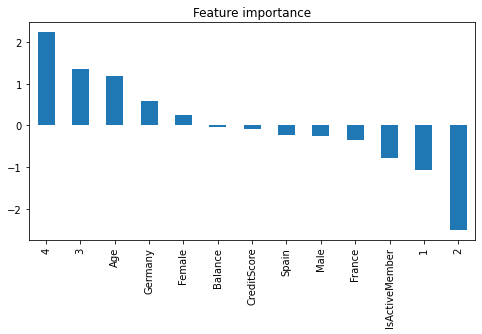

In [90]:
f, ax = plt.subplots(figsize= [8,4])

weights = pd.Series(LR.coef_[0], index=df.columns.values)
weights.sort_values(ascending = False).plot(kind='bar')

ax.set_title("Feature importance")
f.show()

Conclusions:

<div align="justify">We can see that some variables have a negative relation to the churn, while some have positive relation. Negative relation means that likeliness of churn decreases with that variable.</div>

<div align="justify">The number of products 4 or 3, increasing Age, location in Germany, Female sex may lead to higher churn rates.</div>

## 5.2 K-nearest neighbors<a class="anchor" id="KNN"></a>

In [91]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
y_pred2 = KNN.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred2)

0.8505892255892256

In [93]:
param_grid2 = {'n_neighbors' : [3,4,5,6,7,8]}
search_KNN = GridSearchCV(KNN, param_grid2, cv=5)
search_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8]})

In [94]:
search_KNN.best_params_

{'n_neighbors': 8}

In [95]:
KNN = KNeighborsClassifier(n_neighbors = 8)
KNN.fit(X_train, y_train)
y_pred2 = KNN.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred2)

0.8522727272727273

In [97]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1891
           1       0.74      0.43      0.54       485

    accuracy                           0.85      2376
   macro avg       0.80      0.69      0.73      2376
weighted avg       0.84      0.85      0.84      2376



## 5.3 Support Vector Machine<a class="anchor" id="SVM"></a>

In [98]:
SVM = SVC(kernel='poly')
SVM.fit(X_train, y_train)

SVC(kernel='poly')

In [99]:
y_pred3 = SVM.predict(X_test)

In [100]:
accuracy_score(y_test, y_pred3)

0.8686868686868687

In [101]:
param_grid3 = {'degree' : [2,3,4,5,6], 'kernel' : ['poly']}
search_SVM = GridSearchCV(SVM, param_grid3, cv=5)
search_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']})

In [102]:
search_SVM.best_params_

{'degree': 3, 'kernel': 'poly'}

In [103]:
SVM = SVC(kernel='poly', degree=4)
SVM.fit(X_train, y_train)
y_pred3 = SVM.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred3)

0.8724747474747475

In [105]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1891
           1       0.85      0.45      0.59       485

    accuracy                           0.87      2376
   macro avg       0.86      0.72      0.76      2376
weighted avg       0.87      0.87      0.86      2376



## 5.4 Random Forest<a class="anchor" id="RF"></a>

In [106]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
y_pred4 = RF.predict(X_test)

In [108]:
accuracy_score(y_test, y_pred4)

0.8657407407407407

In [109]:
param_grid4 = {'min_samples_split' : [1,2,3], 'min_samples_leaf': [1,2,3], 'n_estimators': [100, 200]}
search_RF = GridSearchCV(RF, param_grid4, cv=5)
search_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200]})

In [110]:
search_RF.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}

In [111]:
RF = RandomForestClassifier(min_samples_leaf=3, min_samples_split=3, n_estimators=200)
RF.fit(X_train, y_train)
y_pred4 = RF.predict(X_test)

In [112]:
accuracy_score(y_test, y_pred4)

0.8712121212121212

In [113]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1891
           1       0.76      0.54      0.63       485

    accuracy                           0.87      2376
   macro avg       0.83      0.75      0.78      2376
weighted avg       0.86      0.87      0.86      2376



Below we can see the confusion matrix for the Random forest model.

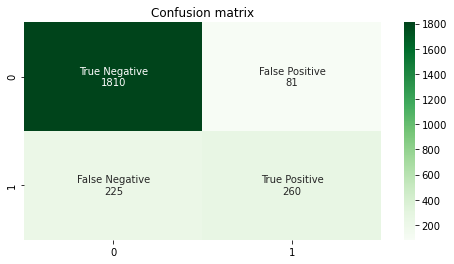

In [114]:
cm = confusion_matrix(y_test, y_pred4)

f, ax = plt.subplots(figsize= [8,4])

names = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

ax.set_title("Confusion matrix")
f.show()

In [115]:
w = RF.feature_importances_
print(w)


[0.15225189 0.38584896 0.1643588  0.03346385 0.0102507  0.0104199
 0.0130646  0.03045296 0.00918926 0.03799485 0.08545678 0.05347664
 0.0137708 ]


In [116]:
df.columns.values

array(['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'Female',
       'Male', 'France', 'Germany', 'Spain', 1, 2, 3, 4], dtype=object)

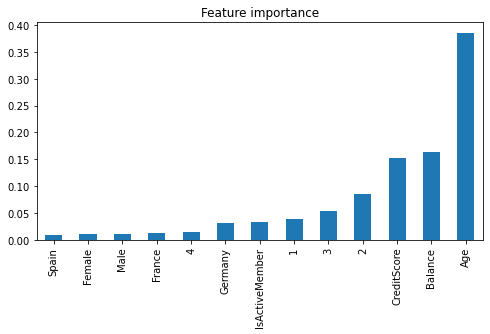

In [117]:
f, ax = plt.subplots(figsize= [8,4])

weights = pd.Series(w, index=df.columns.values)
weights.sort_values().plot(kind = 'bar')

ax.set_title("Feature importance")
f.show()

Conclusions:

We can see that "Age", "Balance" and "CreditScore" contribute the most.

# 6. Model selection. Conclusions<a class="anchor" id="MS"></a>

<p><div align="justify">In the first part of the research, we tried to identify and visualize which factors contribute to customer churn.</div></p>

<p><div align="justify">According to this research, the most important factors are $\color{red}{\text{Age}}$ and $\color{red}{\text{Balance}}$. They contribute the most to the customer churn.</div></p>

<p><div align="justify">The median age for "Exited" category is 45 years in comparison with 36 years for "not Exited" one. The highest churn is for the age range (50,60]. It reaches more than 56%. Perhaps the bank should think about introducing special programs for the elderly.</div></p>

<p><div align="justify">People with the highest balance tend to leave. The median balance for "Exited" group is about 109000 in comparison with 92000 for "not Exited" group. There are no many customers who have a balance of more than 202320 (only 29). But for this category the churn reaches up to 100%. They might be the key-customers who bring good revenue to the bank.
Perhaps, there is a necessity to suggest some benefits for this category of customers.   
</div></p>

<p><div align="justify">People who have $\color{red}{\text{3 or 4 number of products}}$ leave much more often. Churn percentage: 1 product - 28%, 2 products - 7%, 3 products - 83%, 4 products - 100%. There may be some quality issues with additional products. The bank should pay attention to this.</div></p>

<p><div align="justify">There is $\color{red}{\text{a large churn rate for German residents}}$. More than 32%, in comparison with approximately 16% for France and Spain. The bank should do more research there.</div></p>


<p><div align="justify">In the second part, we tried to build a prediction model that will classify if a customer is going to churn or not.</div></p>

<p><div align="justify"> We considered 4 different machine learning models: "Logistic regression", "K-nearest neighbors", "Support vector machine" and "Random forest". Also, we got the classification report on each model.</div></p>

<p><div align="justify"> As the main goal of the project was to predict if a customer is going to churn or not. The most valuable metric for us is recall which tells us how many actual exited customers are predicted correctly. Because the main goal of the model is to provide the business with a forecast that will allow detecting customers, who are going to leave and take measures to retain them.</div></p>

<p><div align="justify">We also shouldn't forget about accuracy in general and about the balance between precision (how many of predicted "Exited" are actual "Exited") and recall.</div></p>

<p>$\color{red}{\text{The Random forest model}}$ showed us the best result:</p>
\begin{equation}
accuracy = 0.87,
precision = 0.76,
recall = 0.54,
f1 = 0.63.
\end{equation}
Thus, the model predicts 54% of actual "Exited" customers. 76% of predicted to be "Exited" customers are actual "Exited".


The developed model can bring practical benefits and can be used to develop a client retention program.